# K-means Clustering
The most popular algorithms for clustering is the K-mean clustering.
What happen for non seperated clusters ? 

## Notations and Optimization Objective

- $x^{1}, x^{2}, ..., x^{n}$ : training set 

- $K$ : number of clusters

- $c^{(k)}$ : cluster index/category (1,2,..K)

- $\mu_{k}$ : cluster centroid $k$

- $\mu_{c^{(i)}}$ : cluster centroid of cluster to which example $x^{(i)}$ is assigned 

The cost function is called the **distortion** for k-means optimization.

## Initialize Data

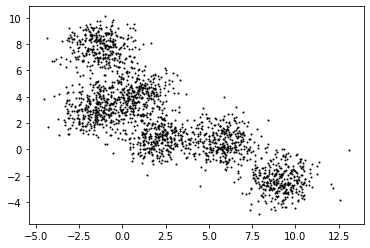

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Generate a random dataset 
NUM_SAMPLES = 2000
NUM_CATEGORIES = 6
X, y = datasets.make_blobs(n_samples=NUM_SAMPLES, centers=NUM_CATEGORIES, random_state=0)
#X.shape is (n_samples, 2)

plt.scatter(X[:,0], X[:,1], c='black', s=4, marker='.')
#plt.scatter(X[:,0], X[:,1], c=y, s=5, marker='.')

## Implementation from scratch

**Algorithm Steps :**

1. randomly initialize 'cluster centroids' $\mu_{1}, \mu_{2}, ... \mu_{k}$
2. cluster assignment step : each inputs associated with the closest 'cluster centroids'
3. move cluster centroids step : move the cluster centroids $\mu_{k}$ to the average(mean) of point assigned to cluster $k$
4. repeat step 2 # 

**Extra Thought**

How many 'cluster centroids' should we ask ? 

*Elbow method* is to plot the cost function baesd on K (no. of clusters)

How to initialzie the cluster centroids ? 

Take 'cluster centroids' for example by trying multiple random initialization ! 

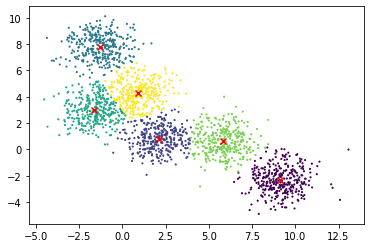

In [3]:
import numpy as np

NUM_ITERATIONS = 10

# 1. initialize centroids and other useful variables
rng = np.random.default_rng(12345) # create random number generator
random_indices = rng.choice(NUM_SAMPLES, NUM_CATEGORIES, replace=False) # pick NUM_CATEGORIES indices
C = X[random_indices] # centroid
cluster_ids = np.empty(NUM_SAMPLES, dtype=int)
cluster_distances = np.empty(NUM_SAMPLES, dtype=float)

def iterate():
    # 2. cluster assignment
    cluster_ids.fill(-1)
    cluster_distances.fill(np.finfo(cluster_distances.dtype).max)
    for centroid_id in range(NUM_CATEGORIES):
        # compute the euclidean distance
        dist = np.linalg.norm(X - C[centroid_id],axis=1)
        is_smaller = dist < cluster_distances
        # assign values where is_small is True
        cluster_ids[is_smaller] = centroid_id
        cluster_distances[is_smaller] = dist[is_smaller]
    #3. move cluster centroids
    for centroid_id in range(NUM_CATEGORIES):
        features = X[cluster_ids == centroid_id] # from centroids
        C[centroid_id] = np.mean(features, axis=0)

for i in range(NUM_ITERATIONS):
    iterate()

plt.scatter(X[:,0], X[:,1], c=cluster_ids, s=5, marker='.')
plt.scatter(C[:,0], C[:,1], c='red', marker='x')


## Implementation with sklearn

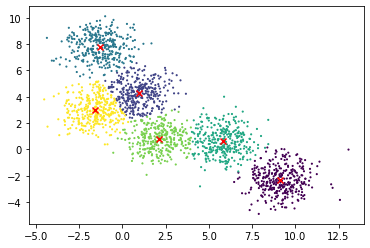

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=NUM_CATEGORIES, random_state=0).fit(X)

C = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, s=5, marker='.')
plt.scatter(C[:,0], C[:,1], c='red', marker='x')

**Prediction Areas**

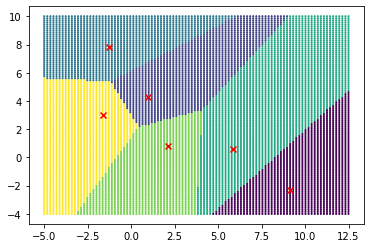

In [5]:
nx = 100
ny = 100
x = np.linspace(-5, 12.5, nx)
y = np.linspace(-4, 10, ny)
xv, yv = np.meshgrid(x, y)
samples = np.empty((nx*ny,2))
samples[:,0] = xv.flatten()
samples[:,1] = yv.flatten()
predictions = kmeans.predict(samples)
plt.scatter(samples[:,0], samples[:,1], c=predictions, s=5, marker='.')
plt.scatter(C[:,0], C[:,1], c='red', marker='x')